# BUSINESS SOLUTION: MAKING GREAT INSIGHT ON 2019 TRANSACTIONAL DATA

## PROBLEM STATEMENT

Despite having collected substantial transactional data for 2019, the client has not yet utilized it to optimize operations or drive sales. The current challenges include:
- Data Overload: The client possesses a large volume of raw data, but it remains unstructured and unanalyzed, making it difficult to derive any meaningful insights.
- Lack of Business Insights: Without proper analysis, the client cannot fully understand the factors driving sales or identify underperforming areas, which limits their ability to make informed decisions.
- Operational Inefficiencies: Without a clear view of inefficiencies in the sales and operational processes, the client may be missing opportunities to streamline operations and reduce costs.
- The absence of a structured approach to analyze and interpret the data has left the client without the insights needed to enhance their business strategy and achieve growth

## OBJECTIVE

The primary objective of this project is to design and implement a comprehensive Business Intelligence solution that enables the client to:
- Identify Sales Opportunities: Uncover trends in customer purchasing patterns, identify best-selling products, and pinpoint underperforming areas.
- Enhance Operational Efficiency: Analyze operational processes to find inefficiencies and opportunities for cost reduction and productivity improvement.
- Generate Actionable Insights: Provide a robust reporting framework that enables data-driven decision-making by transforming raw data into visually compelling and meaningful insights.
- Support Strategic Decision-Making: Deliver a solution that equips the client’s management team with the necessary tools to develop data-driven strategies for boosting sales and improving overall business performance.

This project will culminate in the delivery of a tailored BI solution, supported by detailed reporting, interactive dashboards, and actionable recommendations to help the client make more informed business decisions and seize growth opportunities.


## HYPOTHESIS TESTING

Null Hypothesis (H₀): The Purchase Address does not have a significant effect on Quantity Ordered.

AlternatE Hypothesis (H₁): The Purchase Address has a significant effect on Quantity Ordered.


## ANALYTICAL QUESTIONS

1. How much money did we make this year? 
2. Can we identify any seasonality in the sales? 
3. What are our best and worst-selling products? 
4. How do sales compare to previous months or weeks? 
5. Which cities are our products delivered to most? 
6. How do product categories compare in revenue generated and quantities ordered? 
7. You are required to show additional details from your findings in your data. 


In [1]:
import pyodbc
from dotenv import dotenv_values
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings 


warnings.filterwarnings('ignore')

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [3]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection=pyodbc.connect(connection_string)

## DATA UNDERSTANDING

The data for this project is stored in an SQL database and OneDrive.

In [4]:
query= "SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'"
Data= pd.read_sql(query,connection)

Data

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,Sales_July_2019,BASE TABLE
1,dapDB,dbo,Sales_August_2019,BASE TABLE
2,dapDB,dbo,Sales_September_2019,BASE TABLE
3,dapDB,dbo,Sales_October_2019,BASE TABLE
4,dapDB,dbo,Sales_November_2019,BASE TABLE
5,dapDB,dbo,Sales_December_2019,BASE TABLE


In [5]:
# Select the months from the table
query= 'SELECT * from Sales_July_2019'

July= pd.read_sql(query,connection)
July.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00,"824 Forest St, Seattle, WA 98101"


In [6]:
query= 'SELECT * from Sales_August_2019'

August= pd.read_sql(query,connection)
August.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00,"736 14th St, New York City, NY 10001"


In [7]:
query= 'SELECT * from Sales_September_2019'

September= pd.read_sql(query,connection)
September.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,248151.0,AA Batteries (4-pack),4.0,3.840000,2017-09-19 14:44:00,"380 North St, Los Angeles, CA 90001"
1,248152.0,USB-C Charging Cable,2.0,11.950000,2029-09-19 10:19:00,"511 8th St, Austin, TX 73301"
2,248153.0,USB-C Charging Cable,1.0,11.950000,2016-09-19 17:48:00,"151 Johnson St, Los Angeles, CA 90001"
3,248154.0,27in FHD Monitor,1.0,149.990005,2027-09-19 07:52:00,"355 Hickory St, Seattle, WA 98101"
4,248155.0,USB-C Charging Cable,1.0,11.950000,2001-09-19 19:03:00,"125 5th St, Atlanta, GA 30301"


In [8]:
query= 'SELECT * from Sales_October_2019'

October= pd.read_sql(query,connection)
October.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,259358.0,34in Ultrawide Monitor,1.0,379.989990,2028-10-19 10:56:00,"609 Cherry St, Dallas, TX 75001"
1,259359.0,27in 4K Gaming Monitor,1.0,389.989990,2028-10-19 17:26:00,"225 5th St, Los Angeles, CA 90001"
2,259360.0,AAA Batteries (4-pack),2.0,2.990000,2024-10-19 17:20:00,"967 12th St, New York City, NY 10001"
3,259361.0,27in FHD Monitor,1.0,149.990005,2014-10-19 22:26:00,"628 Jefferson St, New York City, NY 10001"
4,259362.0,Wired Headphones,1.0,11.990000,2007-10-19 16:10:00,"534 14th St, Los Angeles, CA 90001"


In [9]:
query= 'SELECT * from Sales_November_2019'

November= pd.read_sql(query,connection)
November.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,278797.0,Wired Headphones,1.0,11.990000,2021-11-19 09:54:00,"46 Park St, New York City, NY 10001"
1,278798.0,USB-C Charging Cable,2.0,11.950000,2017-11-19 10:03:00,"962 Hickory St, Austin, TX 73301"
2,278799.0,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001"
3,278800.0,27in FHD Monitor,1.0,149.990005,2025-11-19 22:24:00,"649 10th St, Seattle, WA 98101"
4,278801.0,Bose SoundSport Headphones,1.0,99.989998,2009-11-19 13:56:00,"522 Hill St, Boston, MA 02215"


In [10]:
query= 'SELECT * from Sales_December_2019'

December= pd.read_sql(query,connection)
December.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,295665.0,Macbook Pro Laptop,1.0,1700.000000,2030-12-19 00:01:00,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.000000,2029-12-19 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.950000,2012-12-19 18:21:00,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.990005,2022-12-19 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.950000,2018-12-19 12:38:00,"43 Hill St, Atlanta, GA 30301"


### Load the data from the OneDrive

In [11]:
January= pd.read_csv(r"C:\Users\user\Documents\New folder\Capstone\Power BI Capstione Data - (Jan -May)\Sales_January_2019.csv")
January.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [12]:
February= pd.read_csv(r"C:\Users\user\Documents\New folder\Capstone\Power BI Capstione Data - (Jan -May)\Sales_February_2019.csv")
February.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [13]:
March= pd.read_csv(r"C:\Users\user\Documents\New folder\Capstone\Power BI Capstione Data - (Jan -May)\Sales_March_2019.csv")
March.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [14]:
April= pd.read_csv(r"C:\Users\user\Documents\New folder\Capstone\Power BI Capstione Data - (Jan -May)\Sales_April_2019.csv")
April.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [15]:
May= pd.read_csv(r"C:\Users\user\Documents\New folder\Capstone\Power BI Capstione Data - (Jan -May)\Sales_May_2019.csv")
May.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [16]:
June= pd.read_csv(r"C:\Users\user\Documents\New folder\Capstone\Power BI Capstione Data - (Jan -May)\Sales_June_2019.csv")
June.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [17]:
# Rename columns to match 
January.columns=["Order_ID","Product","Quantity_Ordered","Price_Each","Order_Date","Purchase_Address"]
February.columns=["Order_ID","Product","Quantity_Ordered","Price_Each","Order_Date","Purchase_Address"]
March.columns=["Order_ID","Product","Quantity_Ordered","Price_Each","Order_Date","Purchase_Address"]
April.columns=["Order_ID","Product","Quantity_Ordered","Price_Each","Order_Date","Purchase_Address"]
May.columns=["Order_ID","Product","Quantity_Ordered","Price_Each","Order_Date","Purchase_Address"]
June.columns=["Order_ID","Product","Quantity_Ordered","Price_Each","Order_Date","Purchase_Address"]

In [18]:
# Concatenate the data
Data= pd.concat([January,February,March,April,May,June,July,August,September,October,November,December])
Data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001"


### DATA EXPLORATION

In [19]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Price_Each        186110 non-null  object
 4   Order_Date        186110 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [ ]:
Data.duplicated().sum()

In [20]:
Data= Data.drop_duplicates()
Data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001"


In [21]:
Data.isnull().sum()

Order_ID            2
Product             1
Quantity_Ordered    2
Price_Each          2
Order_Date          2
Purchase_Address    1
dtype: int64

### FILLING MISSING VALUES AND PUTTING COLUMNS IN RIGHT DTYPES

In [22]:
Data['Order_ID'] = pd.to_numeric(Data['Order_ID'], errors='coerce')
Data['Order_ID'] = Data['Order_ID'].fillna(0)
Data['Order_ID'] = Data['Order_ID'].astype(int)



In [23]:
Data['Price_Each'] = Data['Price_Each'].fillna(Data['Price_Each'].mode()[0])
Data['Product'] = Data['Product'].fillna(Data['Product'].mode()[0])


In [24]:
Data['Price_Each'] = pd.to_numeric(Data['Price_Each'], errors='coerce')

# You can then convert to float explicitly if needed
Data['Price_Each'] = Data['Price_Each'].astype(float)


In [28]:
# Step 1: Remove or replace any non-numeric values
Data['Quantity_Ordered'] = pd.to_numeric(Data['Quantity_Ordered'], errors='coerce')

# Step 2: Fill NaN values with the mode
Data['Quantity_Ordered'] = Data['Quantity_Ordered'].fillna(Data['Quantity_Ordered'].mode()[0])

# Step 3: Convert the column to integer type
Data['Quantity_Ordered'] = Data['Quantity_Ordered'].astype(int)


In [29]:
Data['Order_Date']= Data['Order_Date'].fillna(method="ffill")

In [30]:
# First attempt to convert using DD-MM-YYYY format
Data["Order_Date"] = pd.to_datetime(Data["Order_Date"], format="%d-%m-%Y %H:%M:%S", errors='coerce')

# For rows where the first conversion failed (NaT), attempt M/D/YYYY H:M format
Data["Order_Date"] = Data["Order_Date"].fillna(pd.to_datetime(Data["Order_Date"], format="%m/%d/%Y %H:%M", errors='coerce'))

# Check for remaining NaT values (if any), which might indicate other formats or data issues
invalid_dates = Data[Data["Order_Date"].isna()]
print("Invalid dates:")
print(invalid_dates)

# Now convert the datetime to the desired format: MM/DD/YYYY
Data["Order_Date"] = Data["Order_Date"].dt.strftime("%m/%d/%Y")

# Display the first few rows to confirm the conversion
print(Data["Order_Date"].head())

Invalid dates:
       Order_ID                   Product  Quantity_Ordered  Price_Each  \
0        141234                    iPhone                 1      700.00   
1        141235  Lightning Charging Cable                 1       14.95   
2        141236          Wired Headphones                 2       11.99   
3        141237          27in FHD Monitor                 1      149.99   
4        141238          Wired Headphones                 1       11.99   
...         ...                       ...               ...         ...   
13617    222905    AAA Batteries (4-pack)                 1        2.99   
13618    222906          27in FHD Monitor                 1      149.99   
13619    222907      USB-C Charging Cable                 1       11.95   
13620    222908      USB-C Charging Cable                 1       11.95   
13621    222909    AAA Batteries (4-pack)                 1        2.99   

      Order_Date                       Purchase_Address  
0            NaT        94

In [31]:
Data['Order_Date']=pd.to_datetime(Data['Order_Date'])

In [32]:
unwanted_dates = Data[(Data['Order_Date'].dt.year > 2019)]
unwanted_dates

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910,Apple Airpods Headphones,1,150.000000,2026-07-19,"389 South St, Atlanta, GA 30301"
2,222912,AA Batteries (4-pack),1,3.840000,2029-07-19,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.840000,2028-07-19,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.990000,2031-07-19,"824 Forest St, Seattle, WA 98101"
6,222916,Google Phone,1,600.000000,2021-07-19,"745 Chestnut St, New York City, NY 10001"
...,...,...,...,...,...,...
25102,319656,Apple Airpods Headphones,1,150.000000,2026-12-19,"700 5th St, Dallas, TX 75001"
25104,319658,AAA Batteries (4-pack),2,2.990000,2024-12-19,"574 Dogwood St, San Francisco, CA 94016"
25108,319662,Bose SoundSport Headphones,1,99.989998,2031-12-19,"939 8th St, San Francisco, CA 94016"
25110,319664,ThinkPad Laptop,1,999.989990,2030-12-19,"767 2nd St, San Francisco, CA 94016"


In [33]:
Data = Data.drop(Data[Data['Order_Date'].isin(unwanted_dates)].index)


#### The rest of the date cleaning was done on excel and saved to an excel file

In [34]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185689 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185689 non-null  int32         
 1   Product           185689 non-null  object        
 2   Quantity_Ordered  185689 non-null  int32         
 3   Price_Each        185688 non-null  float64       
 4   Order_Date        100575 non-null  datetime64[ns]
 5   Purchase_Address  185688 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(2)
memory usage: 8.5+ MB


In [37]:
data= pd.read_excel(r"C:\Users\user\Downloads\Cap 1.xlsx")
data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700.000000,2019-01-22,"Boston,MA"
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28,"Portland,OR"
2,141236,Wired Headphones,2,11.990000,2019-01-17,"San Francisco,CA"
3,141237,27in FHD Monitor,1,149.990000,2019-01-05,"Los Angeles,CA"
4,141238,Wired Headphones,1,11.990000,2019-01-25,"Austin,TX"
...,...,...,...,...,...,...
88473,319460,Bose SoundSport Headphones,1,99.989998,2019-12-19,"Boston,MA"
88474,319468,Wired Headphones,1,11.990000,2019-12-19,"Los Angeles,CA"
88475,319579,Lightning Charging Cable,1,14.950000,2019-12-19,"Los Angeles,CA"
88476,319619,AAA Batteries (4-pack),1,2.990000,2019-12-19,"Los Angeles,CA"


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88478 entries, 0 to 88477
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          88478 non-null  int64         
 1   Product           88478 non-null  object        
 2   Quantity_Ordered  88478 non-null  int64         
 3   Price_Each        88478 non-null  float64       
 4   Order_Date        88478 non-null  datetime64[ns]
 5   Purchase_Address  88478 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.1+ MB


In [39]:
data.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

In [40]:
# Create a new column 'Product Category' based on the 'Price Each' column
data['Product_Category'] = data['Price_Each'].apply(lambda x: 'High_Level' if x > 99.9 else 'Basic_Level')

# View the updated DataFrame
print(data.head())

   Order_ID                   Product  Quantity_Ordered  Price_Each  \
0    141234                    iPhone                 1      700.00   
1    141235  Lightning Charging Cable                 1       14.95   
2    141236          Wired Headphones                 2       11.99   
3    141237          27in FHD Monitor                 1      149.99   
4    141238          Wired Headphones                 1       11.99   

  Order_Date  Purchase_Address Product_Category  
0 2019-01-22         Boston,MA       High_Level  
1 2019-01-28       Portland,OR      Basic_Level  
2 2019-01-17  San Francisco,CA      Basic_Level  
3 2019-01-05    Los Angeles,CA       High_Level  
4 2019-01-25         Austin,TX      Basic_Level  


### EXPLORATORY DATA ANALYSIS

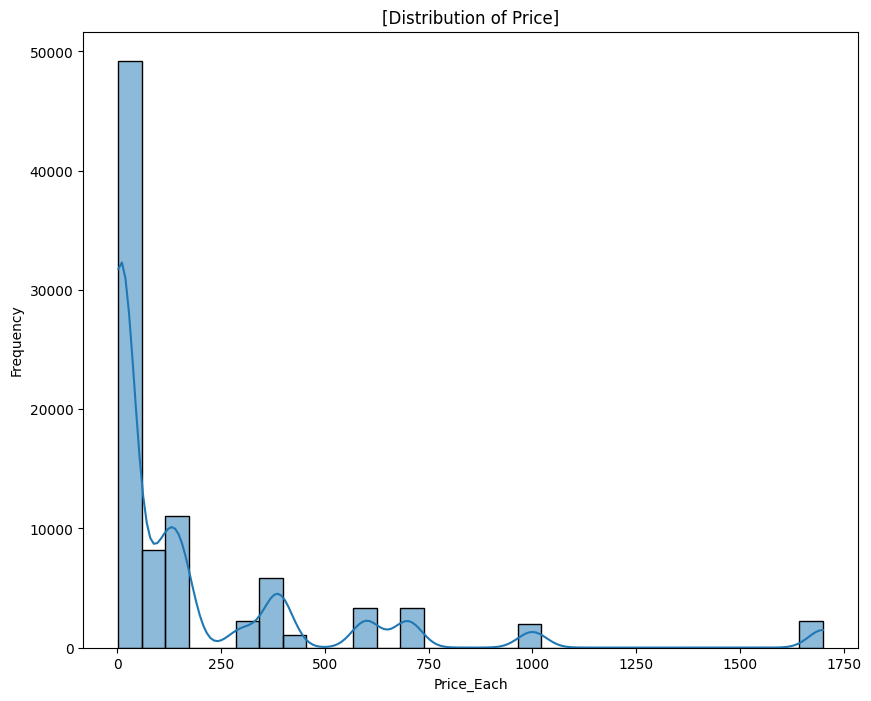

In [41]:
plt.figure(figsize=(10, 8))
sns.histplot(data['Price_Each'], bins=30, kde=True)
plt.title('[Distribution of Price]')
plt.xlabel('Price_Each')
plt.ylabel('Frequency')
plt.show()

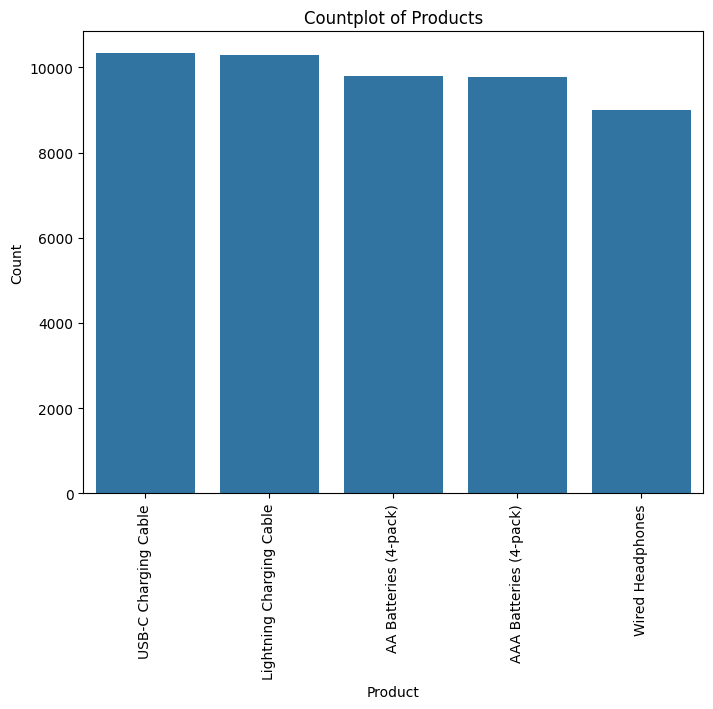

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Product', order=data['Product'].value_counts().head(5).index)

plt.title('Countplot of Products')
plt.xlabel('Product')
plt.ylabel('Count')

plt.xticks(rotation=90) 
plt.show()

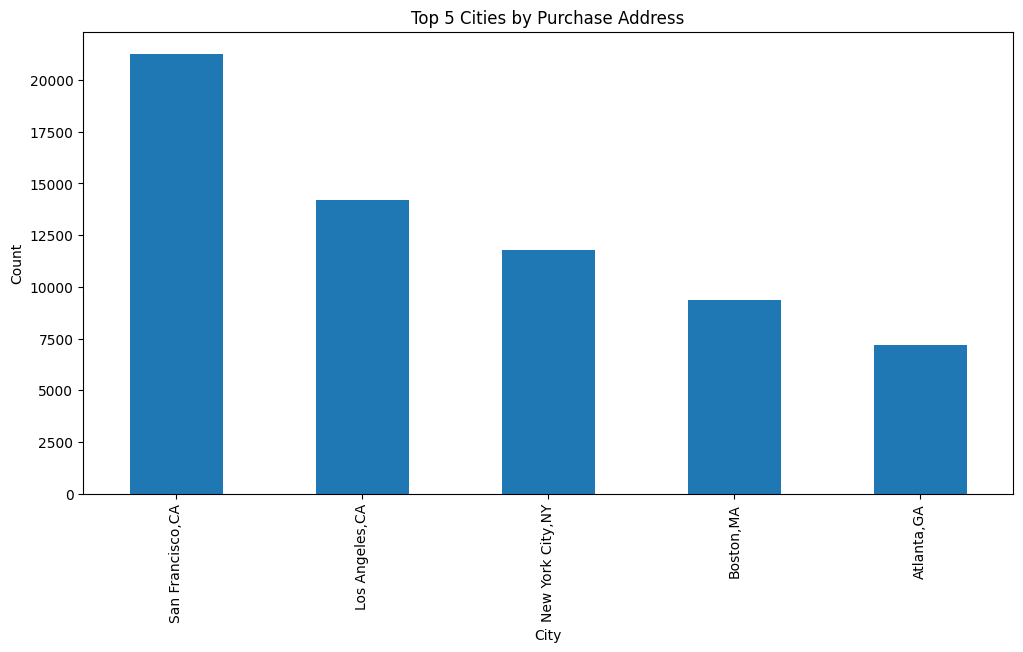

In [43]:
# Plotting the top 5 cities by Purchase Address
plt.figure(figsize=(12, 6))
data['Purchase_Address'].value_counts().head(5).plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Top 5 Cities by Purchase Address')
plt.show()

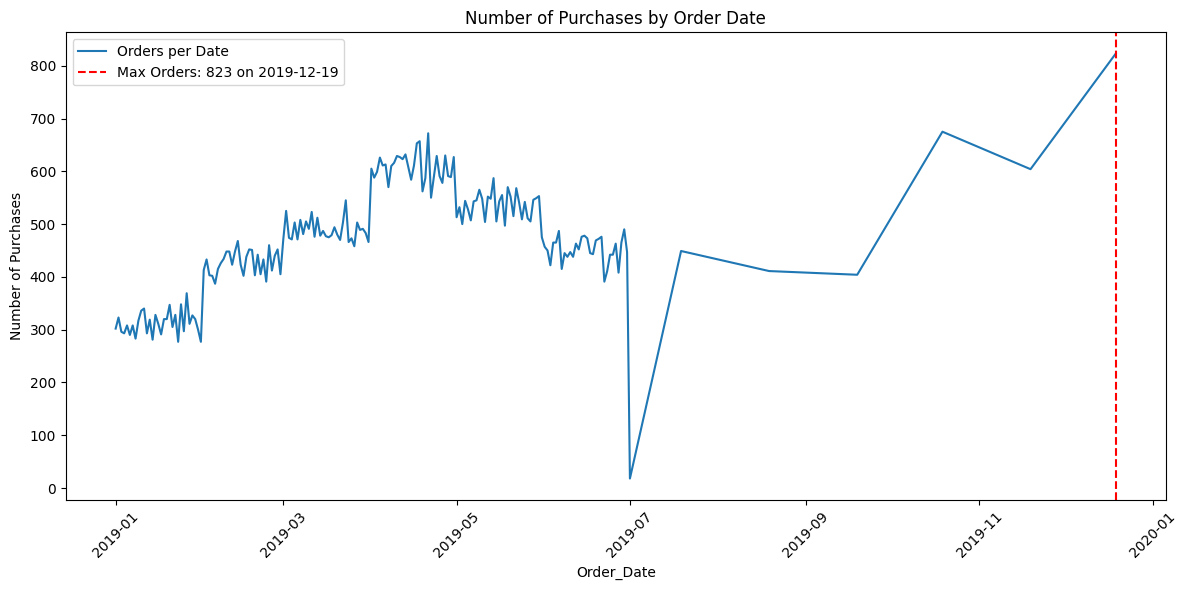

In [44]:
# Group by 'Order Date' and count the number of orders
order_counts = data.groupby(data['Order_Date'].dt.date).size()

# Find the date with the most purchases
max_order_date = order_counts.idxmax()
max_order_count = order_counts.max()

# Plot the number of orders per date
plt.figure(figsize=(12, 6))
plt.plot(order_counts.index, order_counts.values, label='Orders per Date')

# Highlight the date with the most purchases
plt.axvline(x=max_order_date, color='r', linestyle='--', label=f'Max Orders: {max_order_count} on {max_order_date}')

# Customize the plot
plt.title('Number of Purchases by Order Date')
plt.xlabel('Order_Date')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

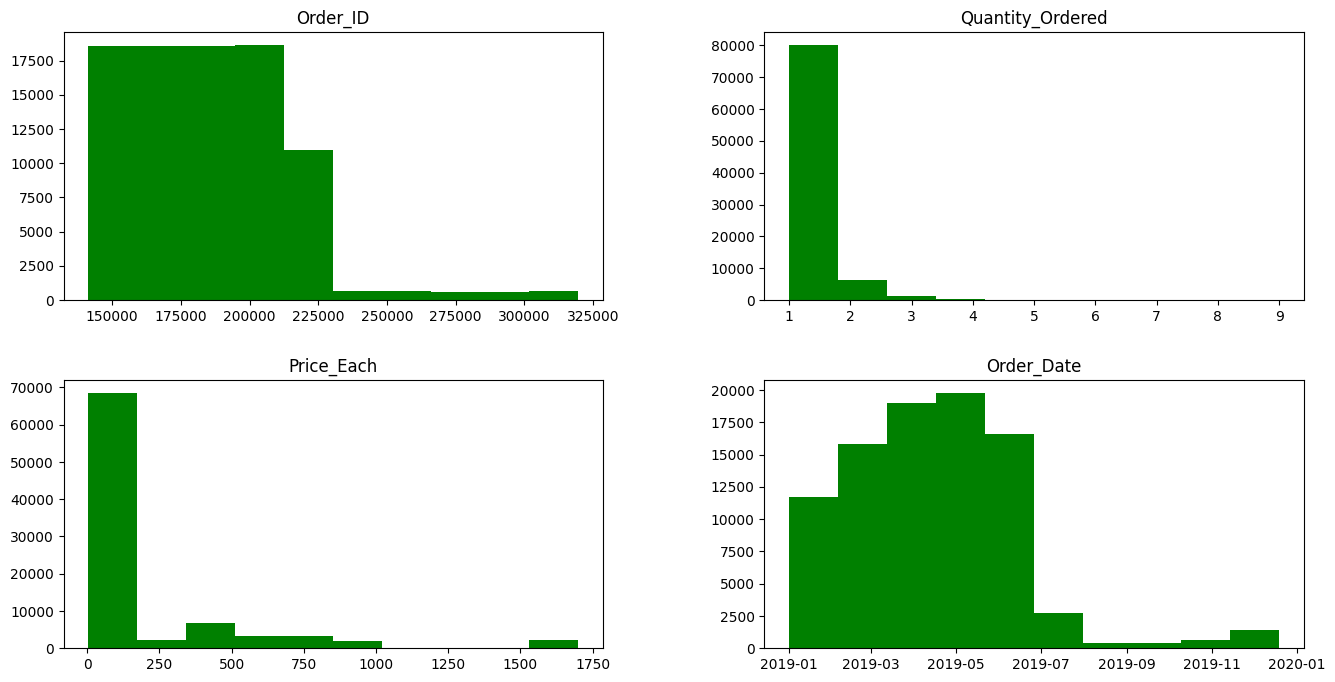

In [45]:
data.hist(figsize=(16,8), grid=False, color = 'green')
plt.show

Correlation Matrix:
                   Price_Each  Quantity_Ordered
Price_Each          1.000000         -0.150693
Quantity_Ordered   -0.150693          1.000000


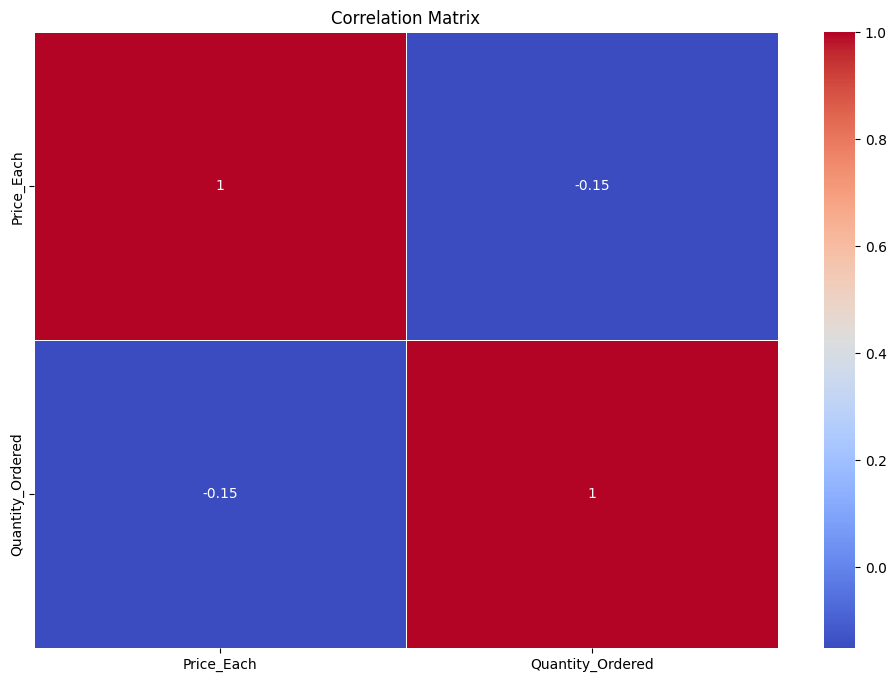

In [46]:
# Calculate correlation matrix
numerical_cols = ['Price_Each', 'Quantity_Ordered']
correlation_matrix = data[numerical_cols].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<Figure size 1500x1000 with 0 Axes>

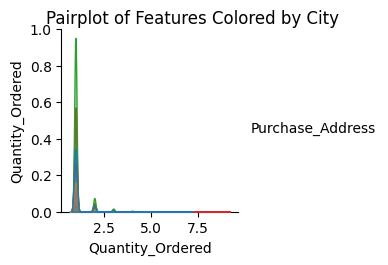

In [47]:
plt.figure(figsize=(15, 10))
sns.pairplot(data[['Product', 'Quantity_Ordered', 'Purchase_Address']], hue='Purchase_Address')
plt.suptitle('Pairplot of Features Colored by City', y=1.02)
plt.show()

### HYPOTHESIS TESTING

In [48]:
# Fit the OLS model: Quantity Ordered ~ Purchase Address
model = ols('Q("Quantity_Ordered") ~ Q("Purchase_Address")', data=data).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

# Extract the p-value
p_value = anova_table['PR(>F)'][0]  
print(f"P-value: {p_value}")

# Define significance level
alpha = 0.05

# Decision
if p_value < alpha:
    print("Reject the null hypothesis: Purchase Address does not have a significant effect on Quantity Ordered.")
else:
    print("Fail to reject the null hypothesis: Purchase Address has a significant effect on Quantity Ordered.")


                             sum_sq       df         F    PR(>F)
Q("Purchase_Address")      1.091128      9.0  0.626661  0.775338
Residual               17115.377418  88468.0       NaN       NaN
P-value: 0.7753380126232642
Fail to reject the null hypothesis: Purchase Address has a significant effect on Quantity Ordered.


### ANALYTICAL QUESTIONS

In [49]:
# How much money did we make this year?

# Calculate total sales (Quantity Ordered * Price Each)
data['Total Sales'] = data['Quantity_Ordered'] * data['Price_Each']

# Calculate the total revenue for the year
total_revenue = data['Total Sales'].sum()

print(f"Total revenue for 2019: ${total_revenue:,.2f}")

Total revenue for 2019: $16,513,908.56


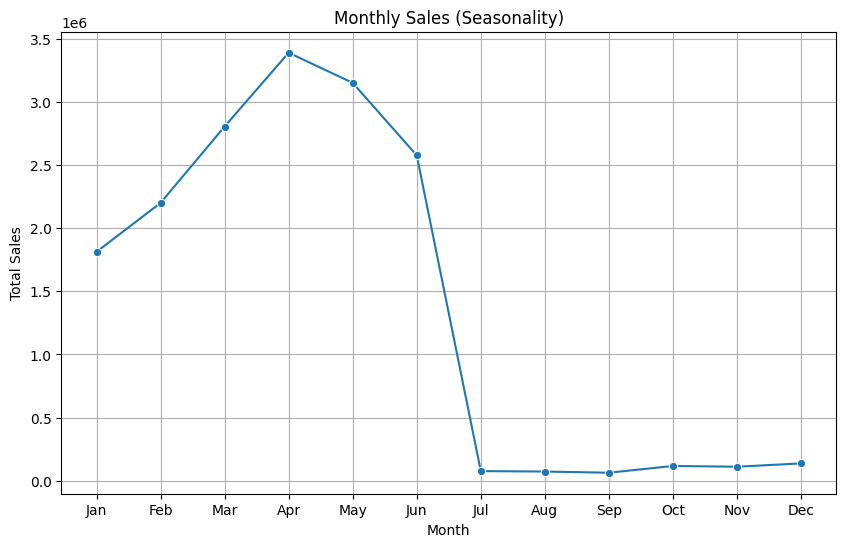

In [50]:
# Extract month from 'Order Date'
data['Month'] = data['Order_Date'].dt.month

# Calculate total sales 
data['Total Sales'] = data['Quantity_Ordered'] * data['Price_Each']

# Group by month and calculate total sales for each month
monthly_sales = data.groupby('Month')['Total Sales'].sum()

# Plot the monthly sales 
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [51]:
# What are our best and worst-selling products? 


# Group by 'Product' and calculate total quantity ordered and total revenue for each product
product_sales = data.groupby('Product').agg({'Quantity_Ordered': 'sum', 'Total Sales': 'sum'})

# Sort products by 'Quantity Ordered' to find the best and worst-selling products
best_selling_products = product_sales.sort_values(by='Quantity_Ordered', ascending=False)
worst_selling_products = product_sales.sort_values(by='Quantity_Ordered', ascending=True)

# Display the best and worst-selling products
print("Top 3 Best-Selling Product by Quantity Ordered:")
print(best_selling_products.head(3))

print("\nTop 3 Worst-Selling Product by Quantity Ordered:")
print(worst_selling_products.head(3))

Top 3 Best-Selling Product by Quantity Ordered:
                        Quantity_Ordered    Total Sales
Product                                                
AAA Batteries (4-pack)             14698   43947.020006
AA Batteries (4-pack)              13210   50726.399953
USB-C Charging Cable               11313  135190.349917

Top 3 Worst-Selling Product by Quantity Ordered:
                    Quantity_Ordered  Total Sales
Product                                          
LG Dryer                         331     198600.0
LG Washing Machine               339     203400.0
Vareebadd Phone                 1020     408000.0


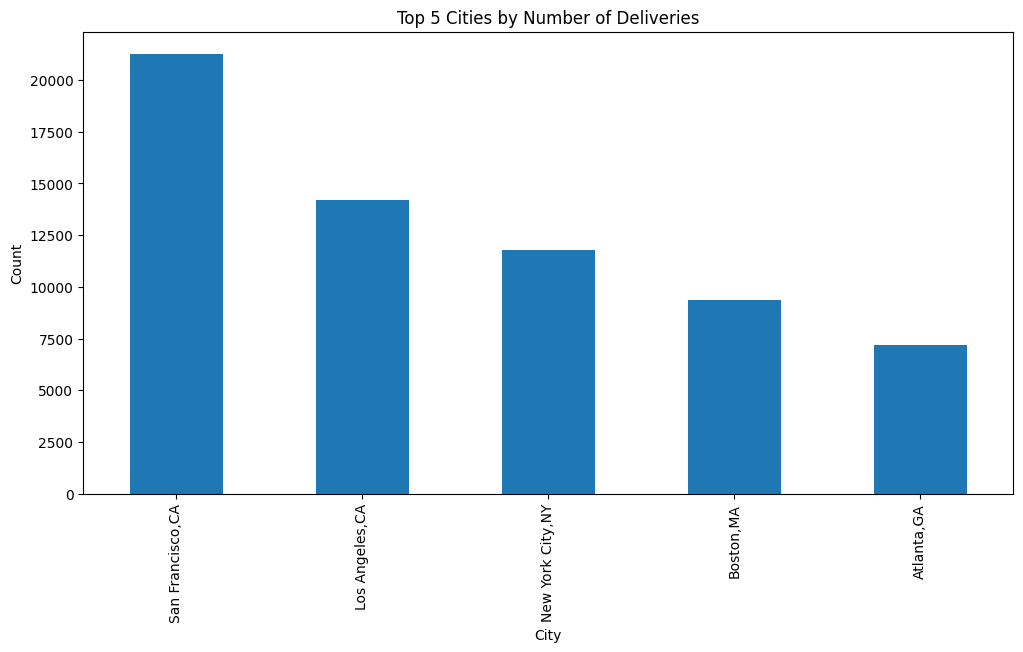

In [52]:
# Plotting the top 5 cities by Purchase Address
plt.figure(figsize=(12, 6))
data['Purchase_Address'].value_counts().head(5).plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Top 5 Cities by Number of Deliveries')
plt.show()

In [54]:
# Calculate revenue for each order (Quantity Ordered * Price Each)
data['Revenue'] = data['Quantity_Ordered'] * data['Price_Each']

# Group by 'Product Category' and calculate total revenue and quantities ordered
category_comparison = data.groupby('Product_Category').agg(
    total_revenue=pd.NamedAgg(column='Revenue', aggfunc='sum'),
    total_quantity=pd.NamedAgg(column='Quantity_Ordered', aggfunc='sum')
)

# Display the comparison of categories in terms of revenue and quantity
print(category_comparison)

                  total_revenue  total_quantity
Product_Category                               
Basic_Level        5.129166e+05           60098
High_Level         1.600099e+07           39444


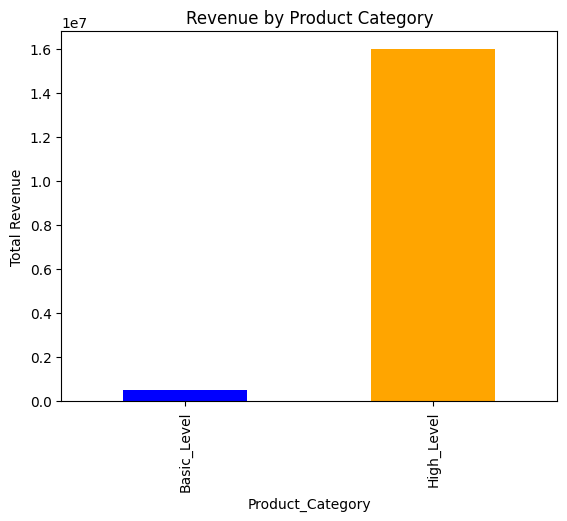

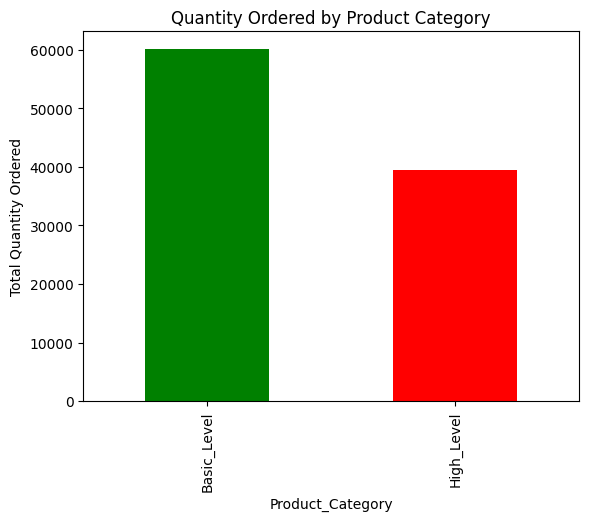

In [55]:
# Plot revenue comparison
category_comparison['total_revenue'].plot(kind='bar', color=['blue', 'orange'], title="Revenue by Product Category")
plt.ylabel('Total Revenue')
plt.show()

# Plot quantity comparison
category_comparison['total_quantity'].plot(kind='bar', color=['green', 'red'], title="Quantity Ordered by Product Category")
plt.ylabel('Total Quantity Ordered')
plt.show()